# Student Performance Cleaning

## This notebook is designed for loading, cleaning, handling missing values (NaN),  
## and saving the datasets separately and also analysing and finding relations.  
## The datasets are related to Portuguese students (Math and Portuguese subjects).

## Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Datasets

In [2]:
math = pd.read_csv("student-mat.csv", sep=";")
por = pd.read_csv("student-por.csv", sep=";")

## Showing First Few Lines

In [4]:
print("📊 Math Dataset:")
display(math.head())

print("📊 Portuguese Dataset:")
display(por.head())


📊 Math Dataset:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


📊 Portuguese Dataset:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Checking Table Information

In [ ]:
print("Math info:")
math.info()

Math info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20 

In [7]:
print("\nPortuguese info:")
por.info()


Portuguese info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    obje

### Checking Data Set Using Describe Method

In [11]:
print("\nMath describe:")
display(math.describe())

print("\nPortuguese describe:")
display(por.describe())


Math describe:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000



Portuguese describe:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


## Checking For Nan Values

In [ ]:
print("\n Number of Nan Values in Math data set")
print(math.isna().sum())

print("\n Number of Nan Values in Porteguse data set")
print(por.isna().sum())


 Number of Nan Values in Math data set
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

 Number of Nan Values in Porteguse data set
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel

### Nan Handeling(In Case Data Set have Nan Values)

In [9]:
def clean_dataset(df):
    for col in df.columns:
        if df[col].dtype in ["int64", "float64"]:
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])
    return df

math_clean = clean_dataset(math.copy())
por_clean = clean_dataset(por.copy())

Checking The Data set After Filling Nan Values

In [10]:
print("\nAfter cleaning (Math):")
print(math_clean.isna().sum().sum(), "Nan values remained")

print("After cleaning (Portuguese):")
print(por_clean.isna().sum().sum(), "Nan values remained")


After cleaning (Math):
0 Nan values remained
After cleaning (Portuguese):
0 Nan values remained


### Hopefully our Data Set Doesn't Have Any Nan Values

## Plotting

### CountPlot(Final Grade Vs Walc)

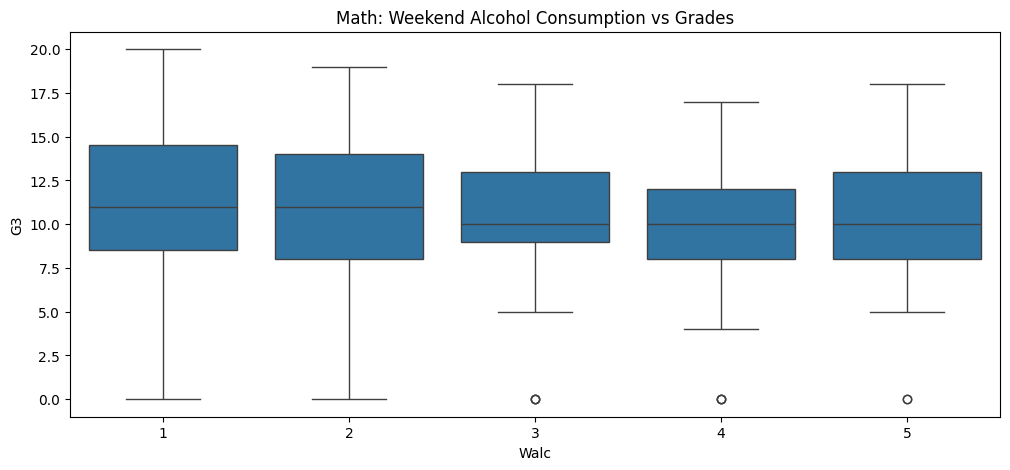

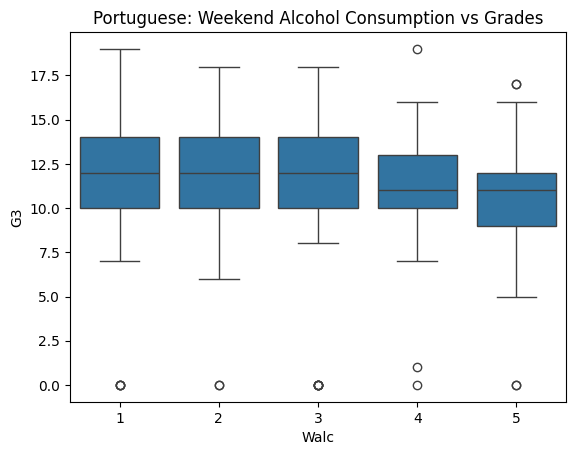

In [27]:
plt.figure(figsize=(12,5))

sns.boxplot(data=math, x="Walc", y="G3")
plt.title("Math: Weekend Alcohol Consumption vs Grades")
plt.show()

sns.boxplot(data=por, x="Walc", y="G3")
plt.title("Portuguese: Weekend Alcohol Consumption vs Grades")
plt.show()


### Scatter Plot (Final Grade Vs StudyTime)

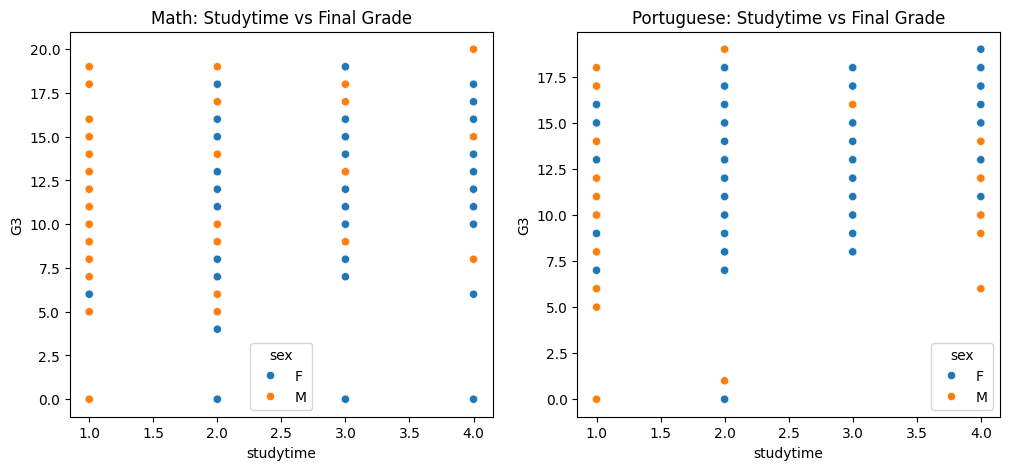

In [26]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(data=math, x="studytime", y="G3", hue="sex")
plt.title("Math: Studytime vs Final Grade")

plt.subplot(1,2,2)
sns.scatterplot(data=por, x="studytime", y="G3", hue="sex")
plt.title("Portuguese: Studytime vs Final Grade")

plt.show()

### Correlation Heatmap

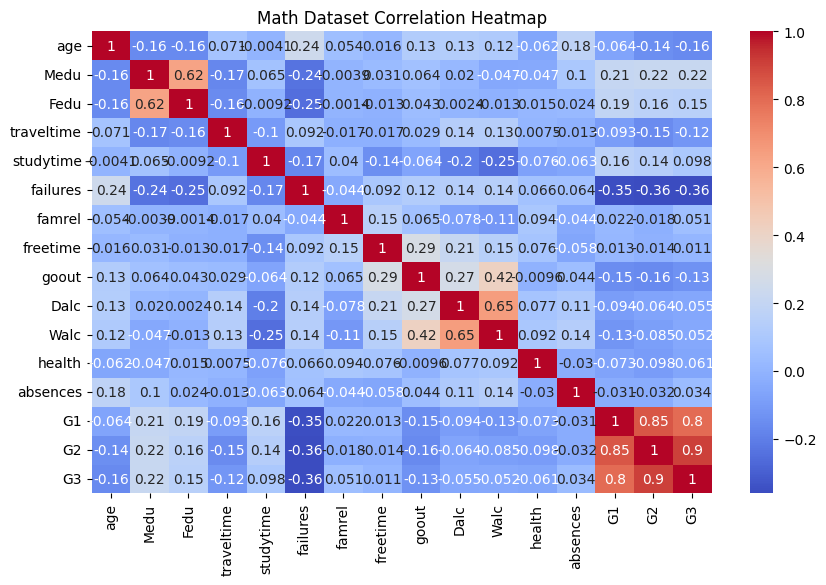

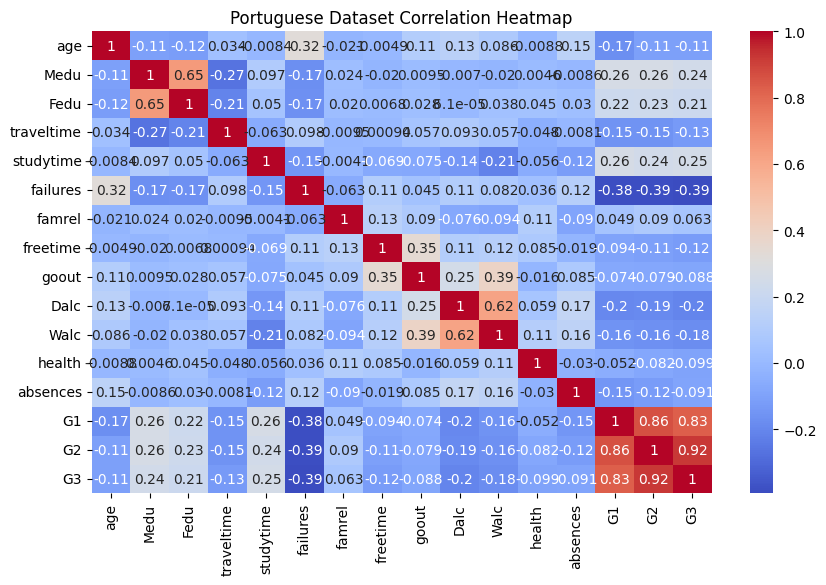

In [25]:
numeric_math = math.select_dtypes(include=[np.number])
numeric_por = por.select_dtypes(include=[np.number])


plt.figure(figsize=(10,6))
sns.heatmap(numeric_math.corr(), annot=True, cmap="coolwarm")
plt.title("Math Dataset Correlation Heatmap")
plt.show()


plt.figure(figsize=(10,6))
sns.heatmap(numeric_por.corr(), annot=True, cmap="coolwarm")
plt.title("Portuguese Dataset Correlation Heatmap")
plt.show()

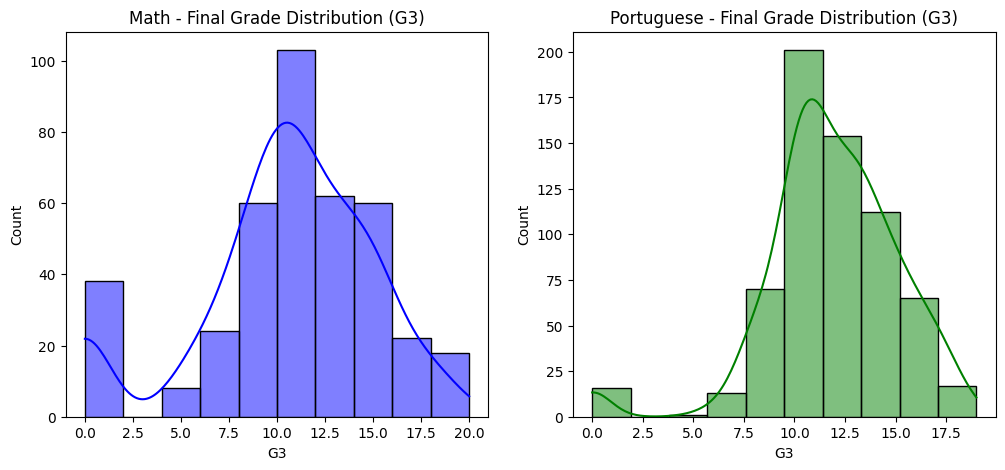

In [22]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(math["G3"], bins=10, kde=True, color="blue")
plt.title("Math - Final Grade Distribution (G3)")

plt.subplot(1,2,2)
sns.histplot(por["G3"], bins=10, kde=True, color="green")
plt.title("Portuguese - Final Grade Distribution (G3)")

plt.show()

### Multivariate Histogram


It Shows Math and Portuguese Final Grade By Gender

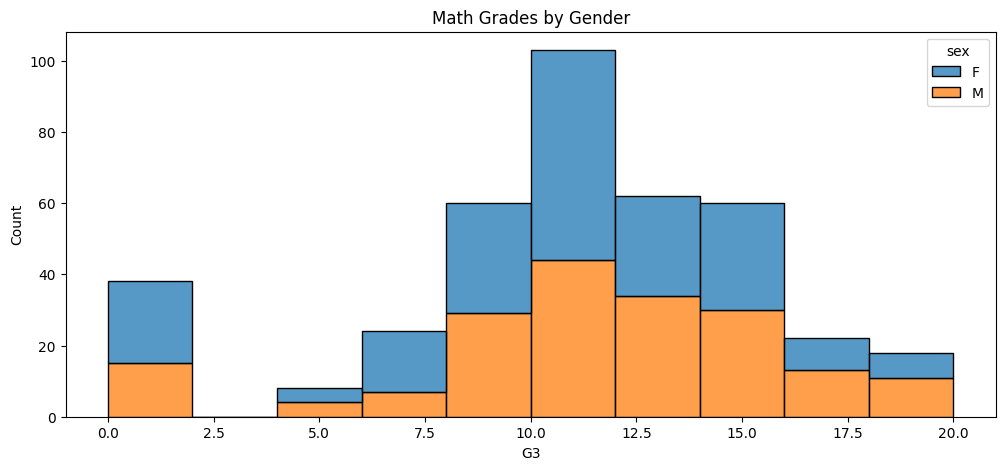

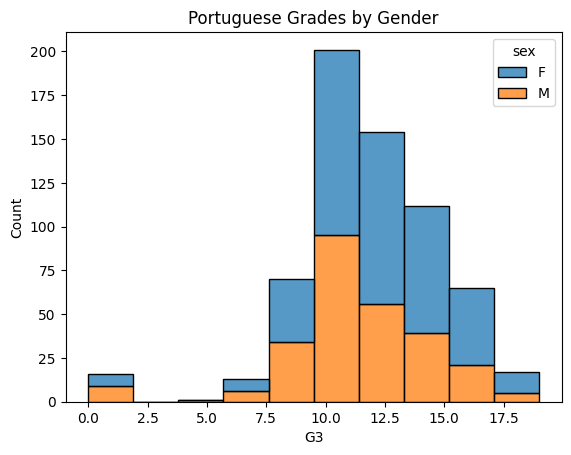

In [21]:
plt.figure(figsize=(12,5))

sns.histplot(data=math, x="G3", hue="sex", multiple="stack", bins=10)
plt.title("Math Grades by Gender")
plt.show()

sns.histplot(data=por, x="G3", hue="sex", multiple="stack", bins=10)
plt.title("Portuguese Grades by Gender")
plt.show()

### Violin Plot Of Final Grade

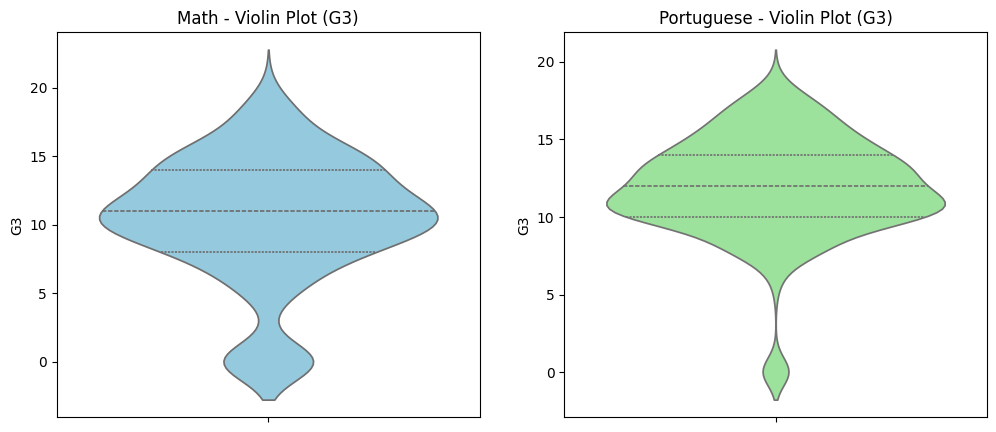

In [19]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.violinplot(y=math["G3"], color="skyblue", inner="quartile")
plt.title("Math - Violin Plot (G3)")

plt.subplot(1,2,2)
sns.violinplot(y=por["G3"], color="lightgreen", inner="quartile")
plt.title("Portuguese - Violin Plot (G3)")

plt.show()

### Histogram Of Final Grade

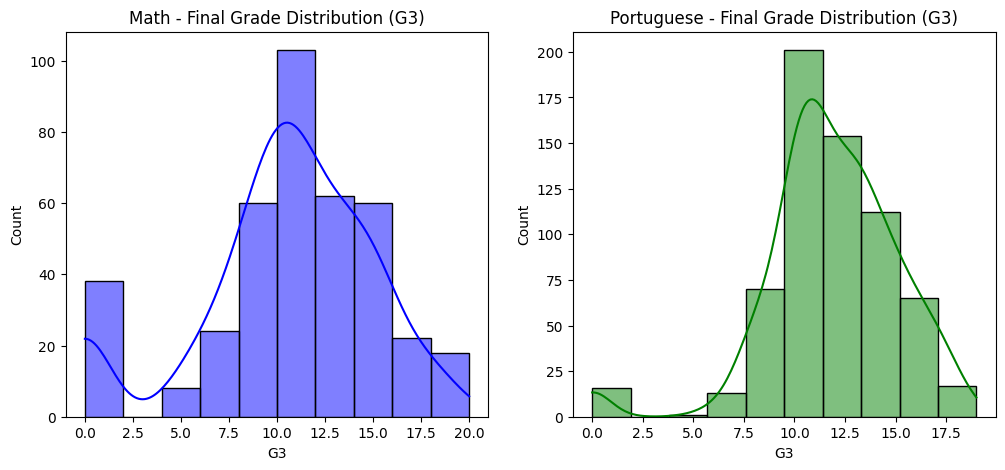

In [16]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(math["G3"], bins=10, kde=True, color="blue")
plt.title("Math - Final Grade Distribution (G3)")

plt.subplot(1,2,2)
sns.histplot(por["G3"], bins=10, kde=True, color="green")
plt.title("Portuguese - Final Grade Distribution (G3)")

plt.show()

### Boxplot Of Final Grade

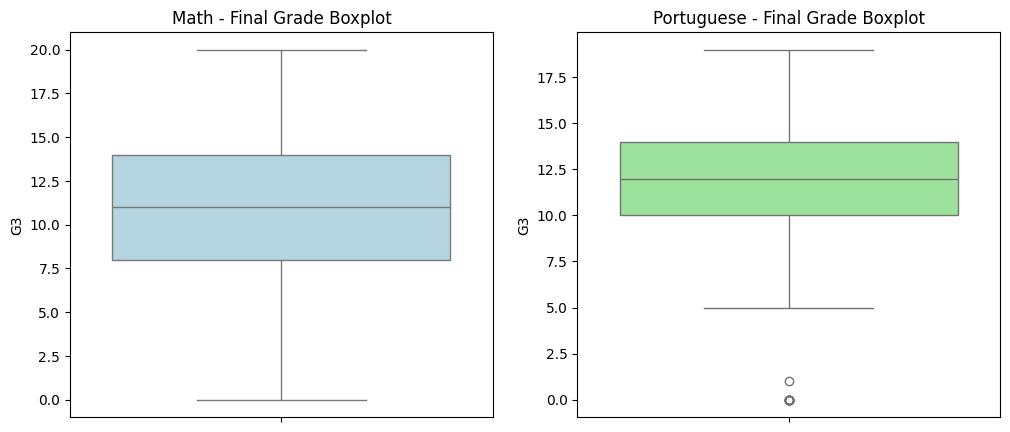

In [18]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y=math["G3"], color="lightblue")
plt.title("Math - Final Grade Boxplot")

plt.subplot(1,2,2)
sns.boxplot(y=por["G3"], color="lightgreen")
plt.title("Portuguese - Final Grade Boxplot")

plt.show()

## Pairplot

### Pairplot Of G1 vs Age

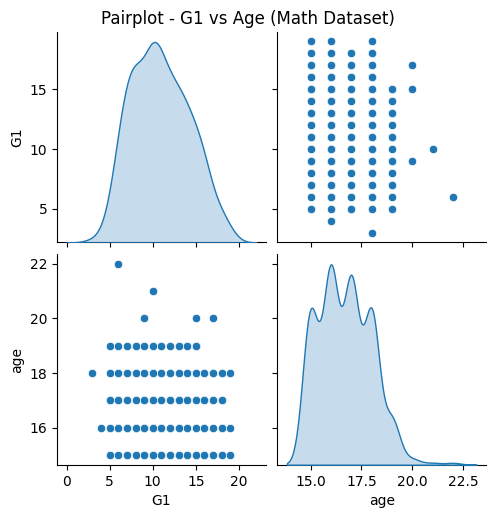

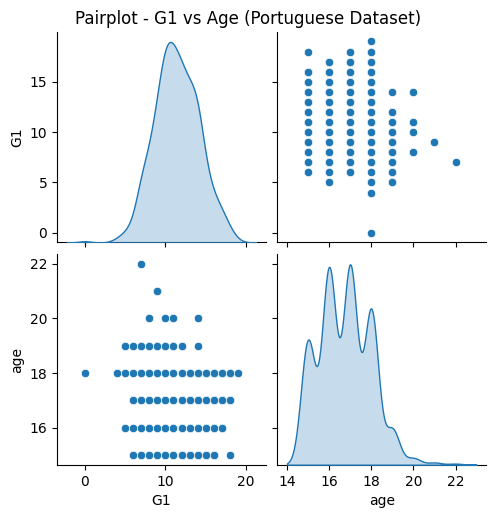

In [31]:
cols_to_plot = ['G1', 'age']

df_mat = pd.read_csv("student-mat.csv", sep=";")
df_por = pd.read_csv("student-por.csv", sep=";")


sns.pairplot(df_mat[cols_to_plot], diag_kind="kde")
plt.suptitle("Pairplot - G1 vs Age (Math Dataset)", y=1.02)
plt.show()

sns.pairplot(df_por[cols_to_plot], diag_kind="kde")
plt.suptitle("Pairplot - G1 vs Age (Portuguese Dataset)", y=1.02)
plt.show()

### Pairplot Of G2 Vs Age

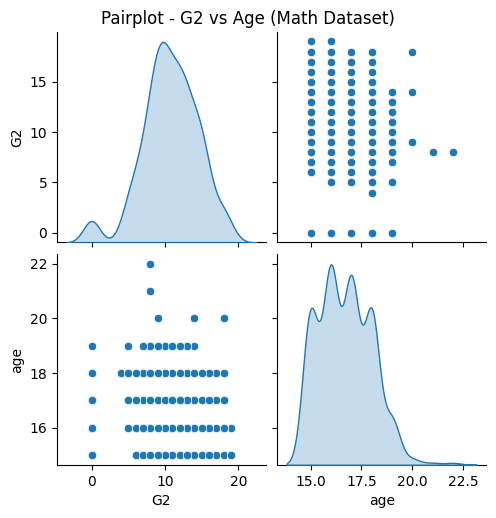

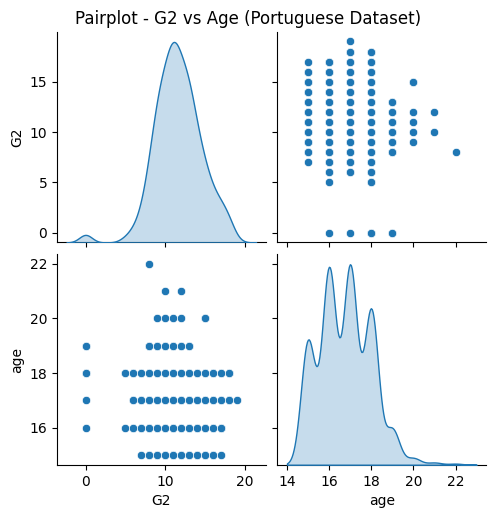

In [34]:
cols_to_plot = ['G2', 'age']

df_mat = pd.read_csv("student-mat.csv", sep=";")
df_por = pd.read_csv("student-por.csv", sep=";")


sns.pairplot(df_mat[cols_to_plot], diag_kind="kde")
plt.suptitle("Pairplot - G2 vs Age (Math Dataset)", y=1.02)
plt.show()

sns.pairplot(df_por[cols_to_plot], diag_kind="kde")
plt.suptitle("Pairplot - G2 vs Age (Portuguese Dataset)", y=1.02)
plt.show()

### Pairplot Of G3 Vs Age

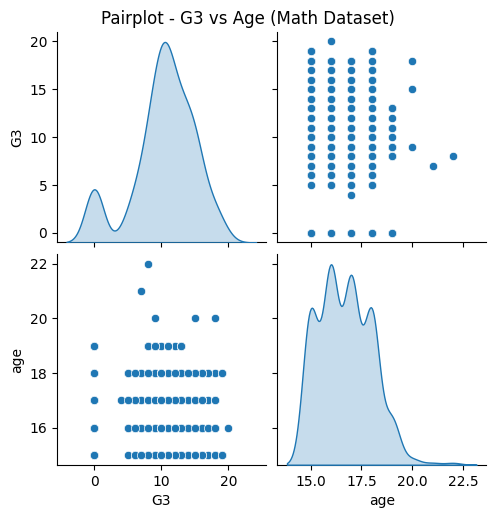

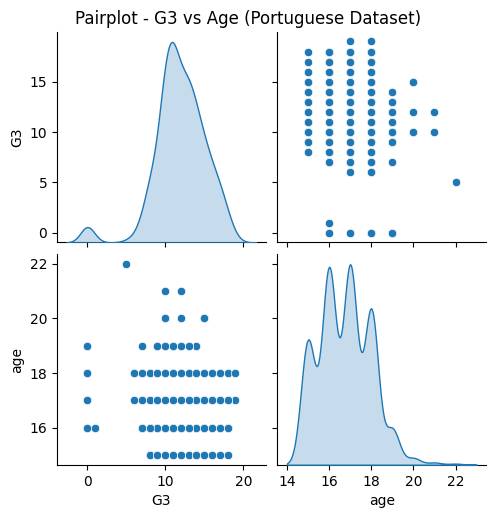

In [33]:
cols_to_plot = ['G3', 'age']

df_mat = pd.read_csv("student-mat.csv", sep=";")
df_por = pd.read_csv("student-por.csv", sep=";")


sns.pairplot(df_mat[cols_to_plot], diag_kind="kde")
plt.suptitle("Pairplot - G3 vs Age (Math Dataset)", y=1.02)
plt.show()

sns.pairplot(df_por[cols_to_plot], diag_kind="kde")
plt.suptitle("Pairplot - G3 vs Age (Portuguese Dataset)", y=1.02)
plt.show()

### Pairplot Of Grades By Studytime And Traveltime

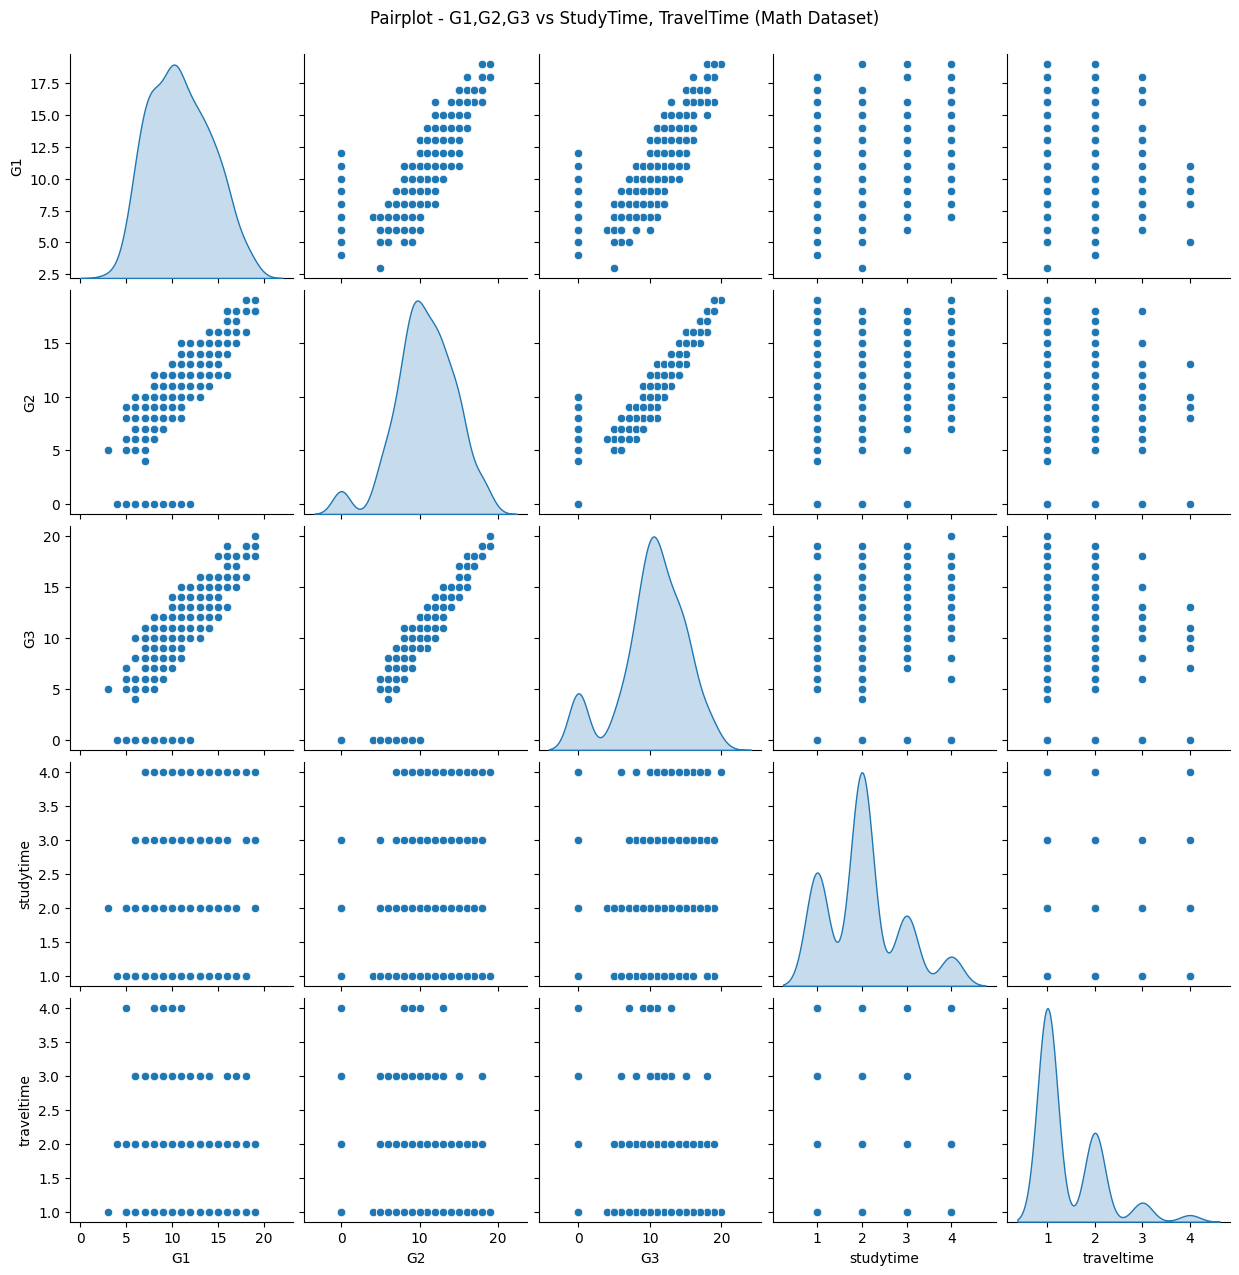

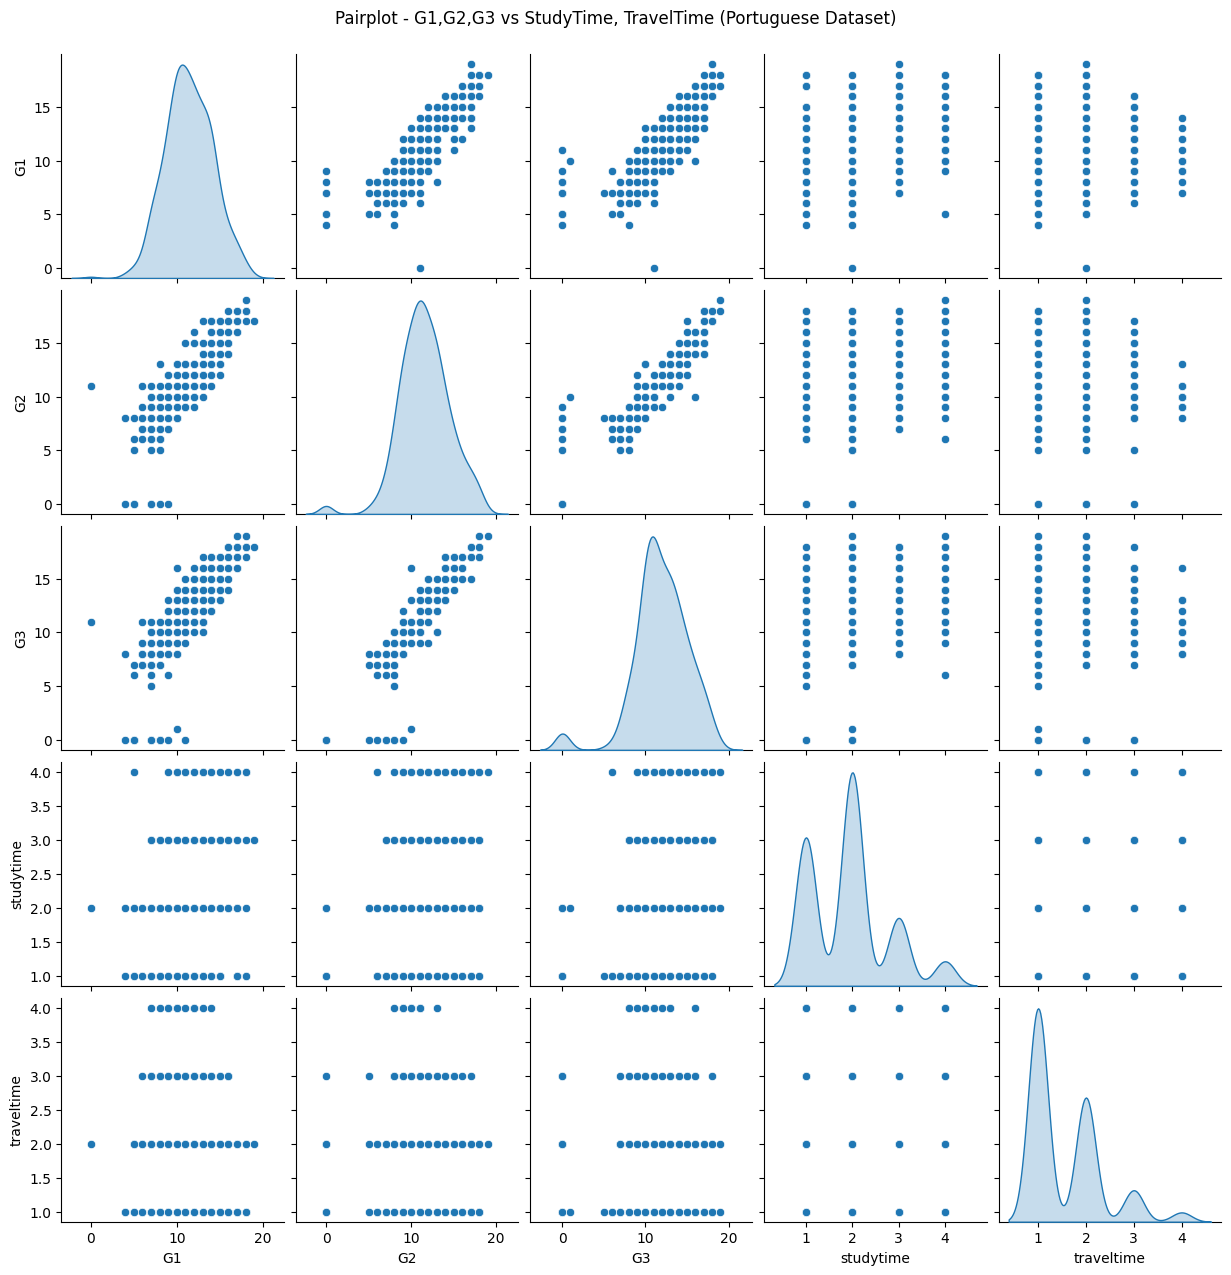

In [35]:
main_cols = ['G1', 'G2', 'G3']
extra_cols = ['studytime', 'traveltime']

cols_to_plot = main_cols + extra_cols

sns.pairplot(df_mat[cols_to_plot], diag_kind="kde")
plt.suptitle("Pairplot - G1,G2,G3 vs StudyTime, TravelTime (Math Dataset)", y=1.02)
plt.show()

sns.pairplot(df_por[cols_to_plot], diag_kind="kde")
plt.suptitle("Pairplot - G1,G2,G3 vs StudyTime, TravelTime (Portuguese Dataset)", y=1.02)
plt.show()


### Pairplot Of Grades By Failures And Absences And Internet

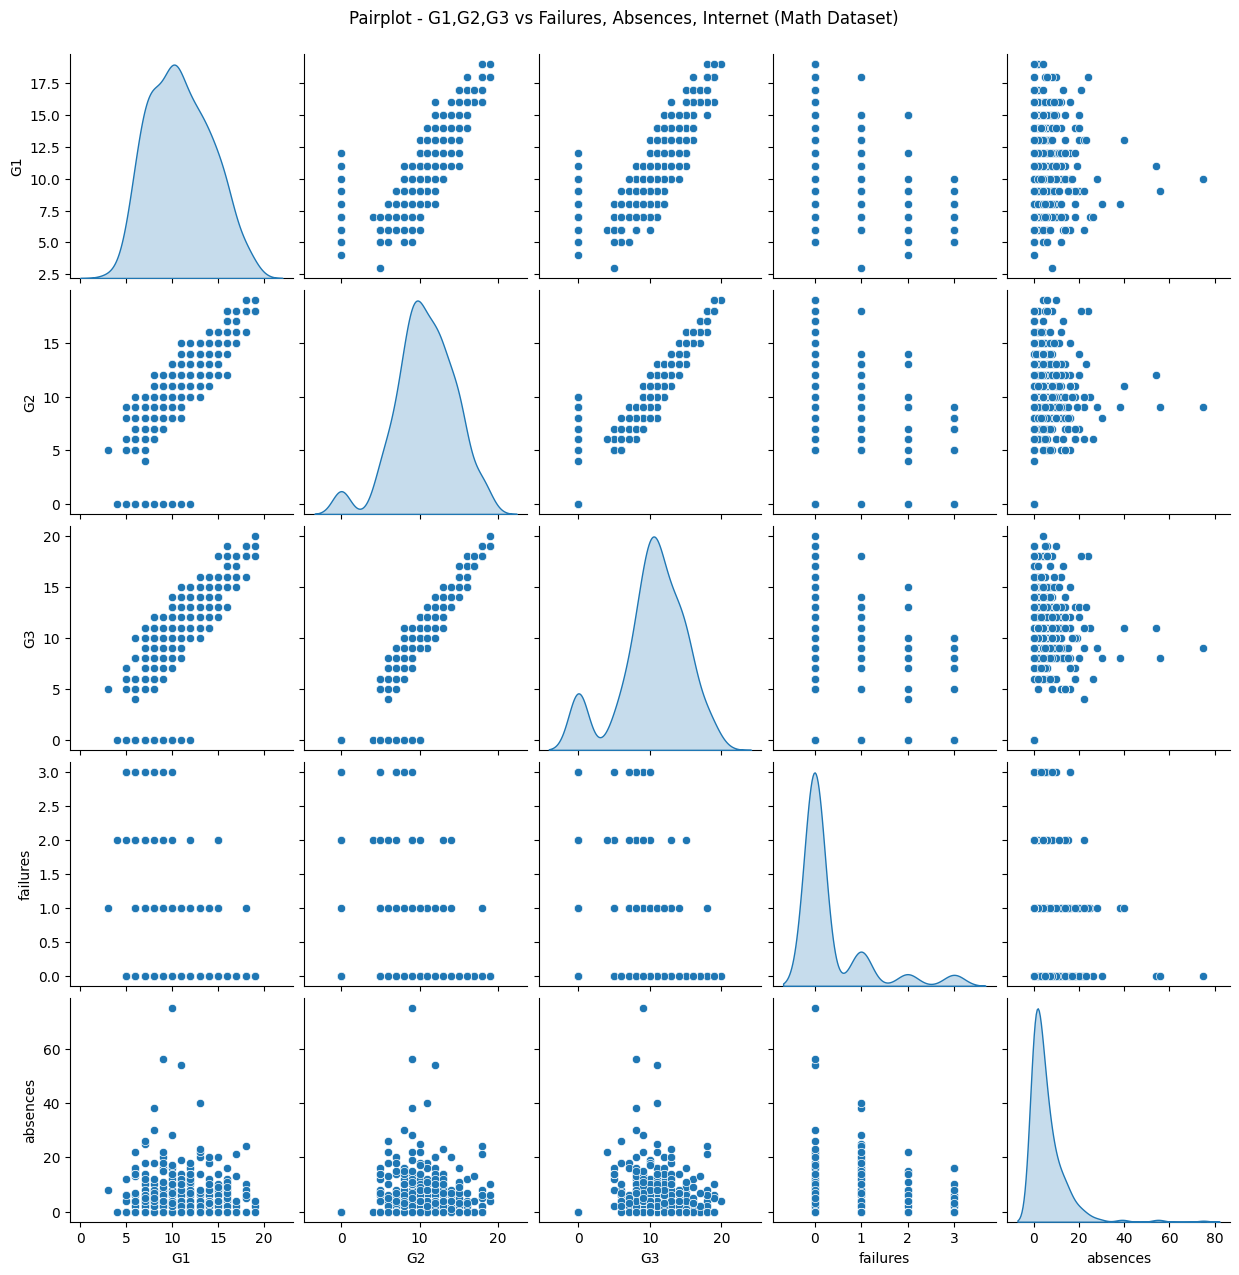

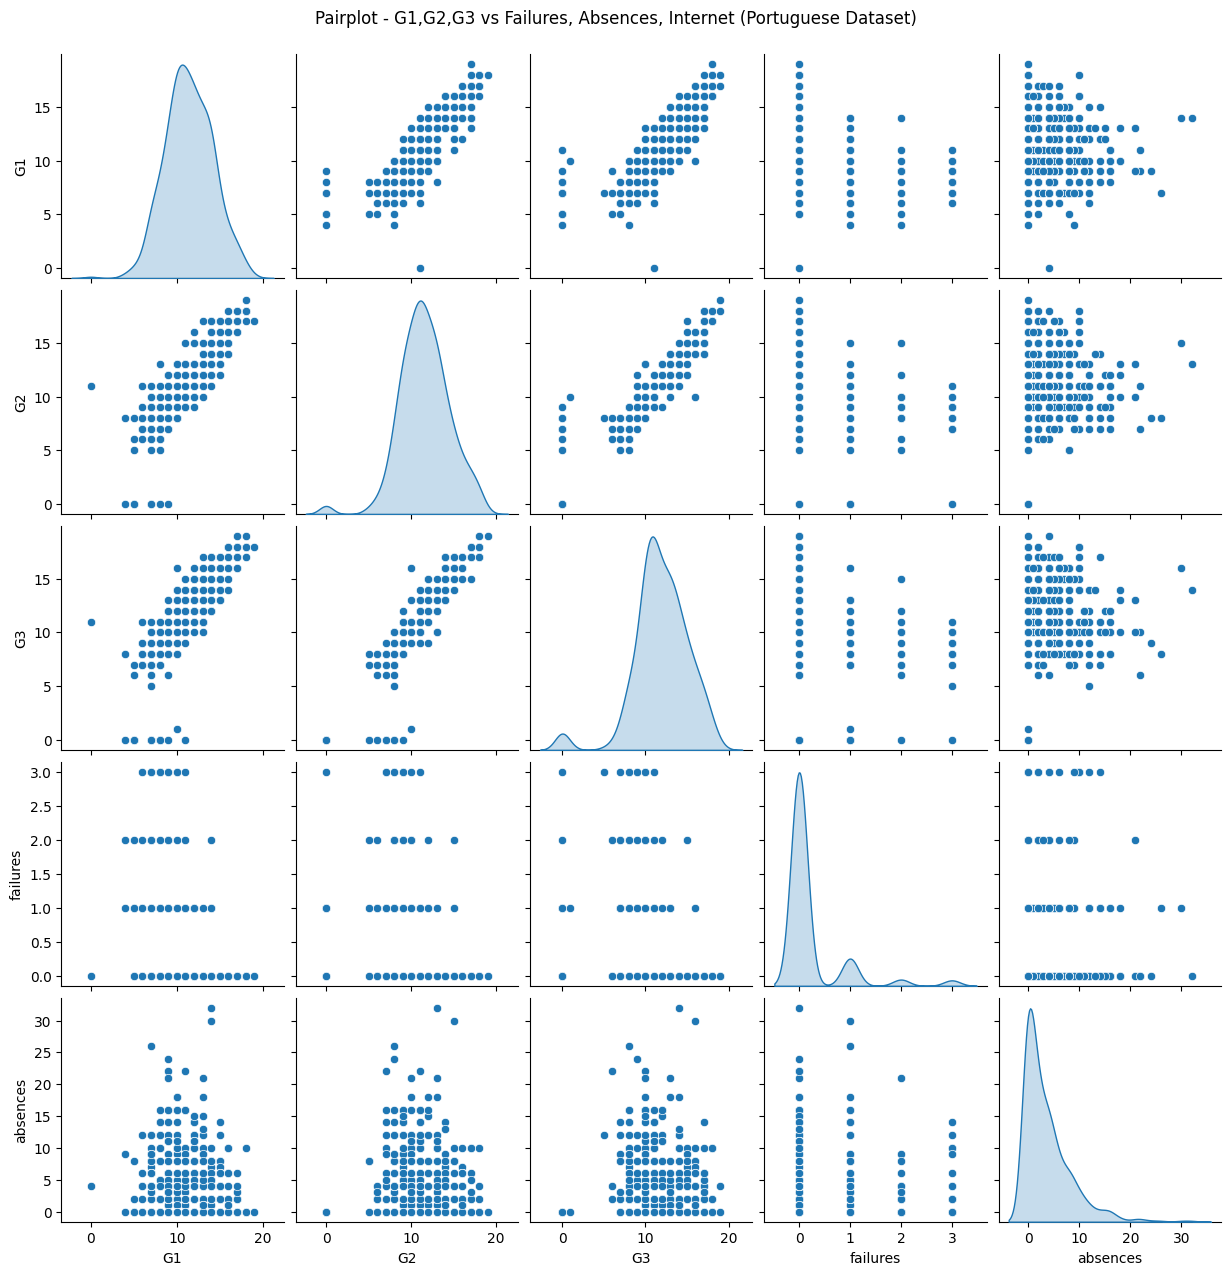

In [36]:
main_cols = ['G1', 'G2', 'G3']
extra_cols = ['failures', 'absences', 'internet']

cols_to_plot = main_cols + extra_cols


sns.pairplot(df_mat[cols_to_plot], diag_kind="kde")
plt.suptitle("Pairplot - G1,G2,G3 vs Failures, Absences, Internet (Math Dataset)", y=1.02)
plt.show()


sns.pairplot(df_por[cols_to_plot], diag_kind="kde")
plt.suptitle("Pairplot - G1,G2,G3 vs Failures, Absences, Internet (Portuguese Dataset)", y=1.02)
plt.show()


### Pairplot Of Grades By Famrel And Goout And health

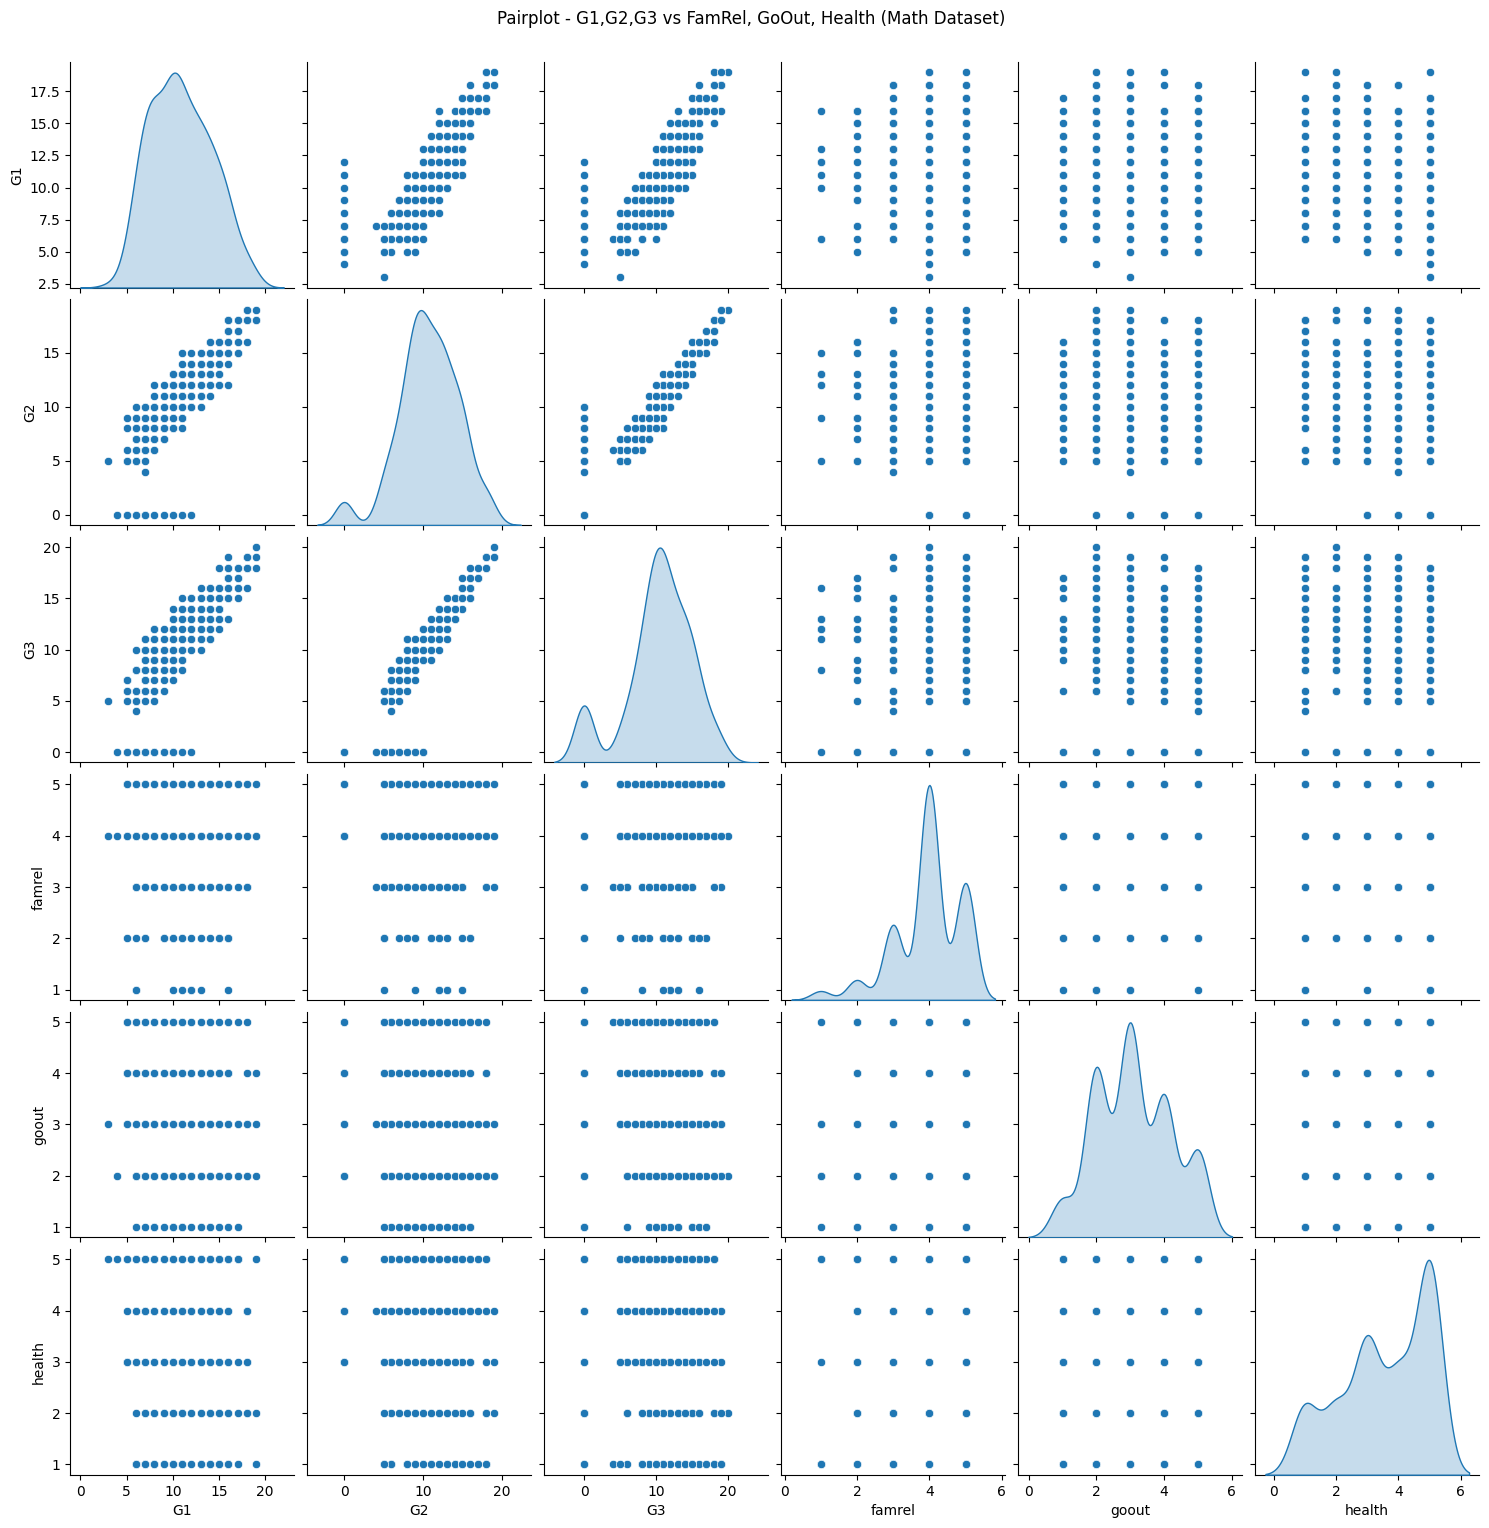

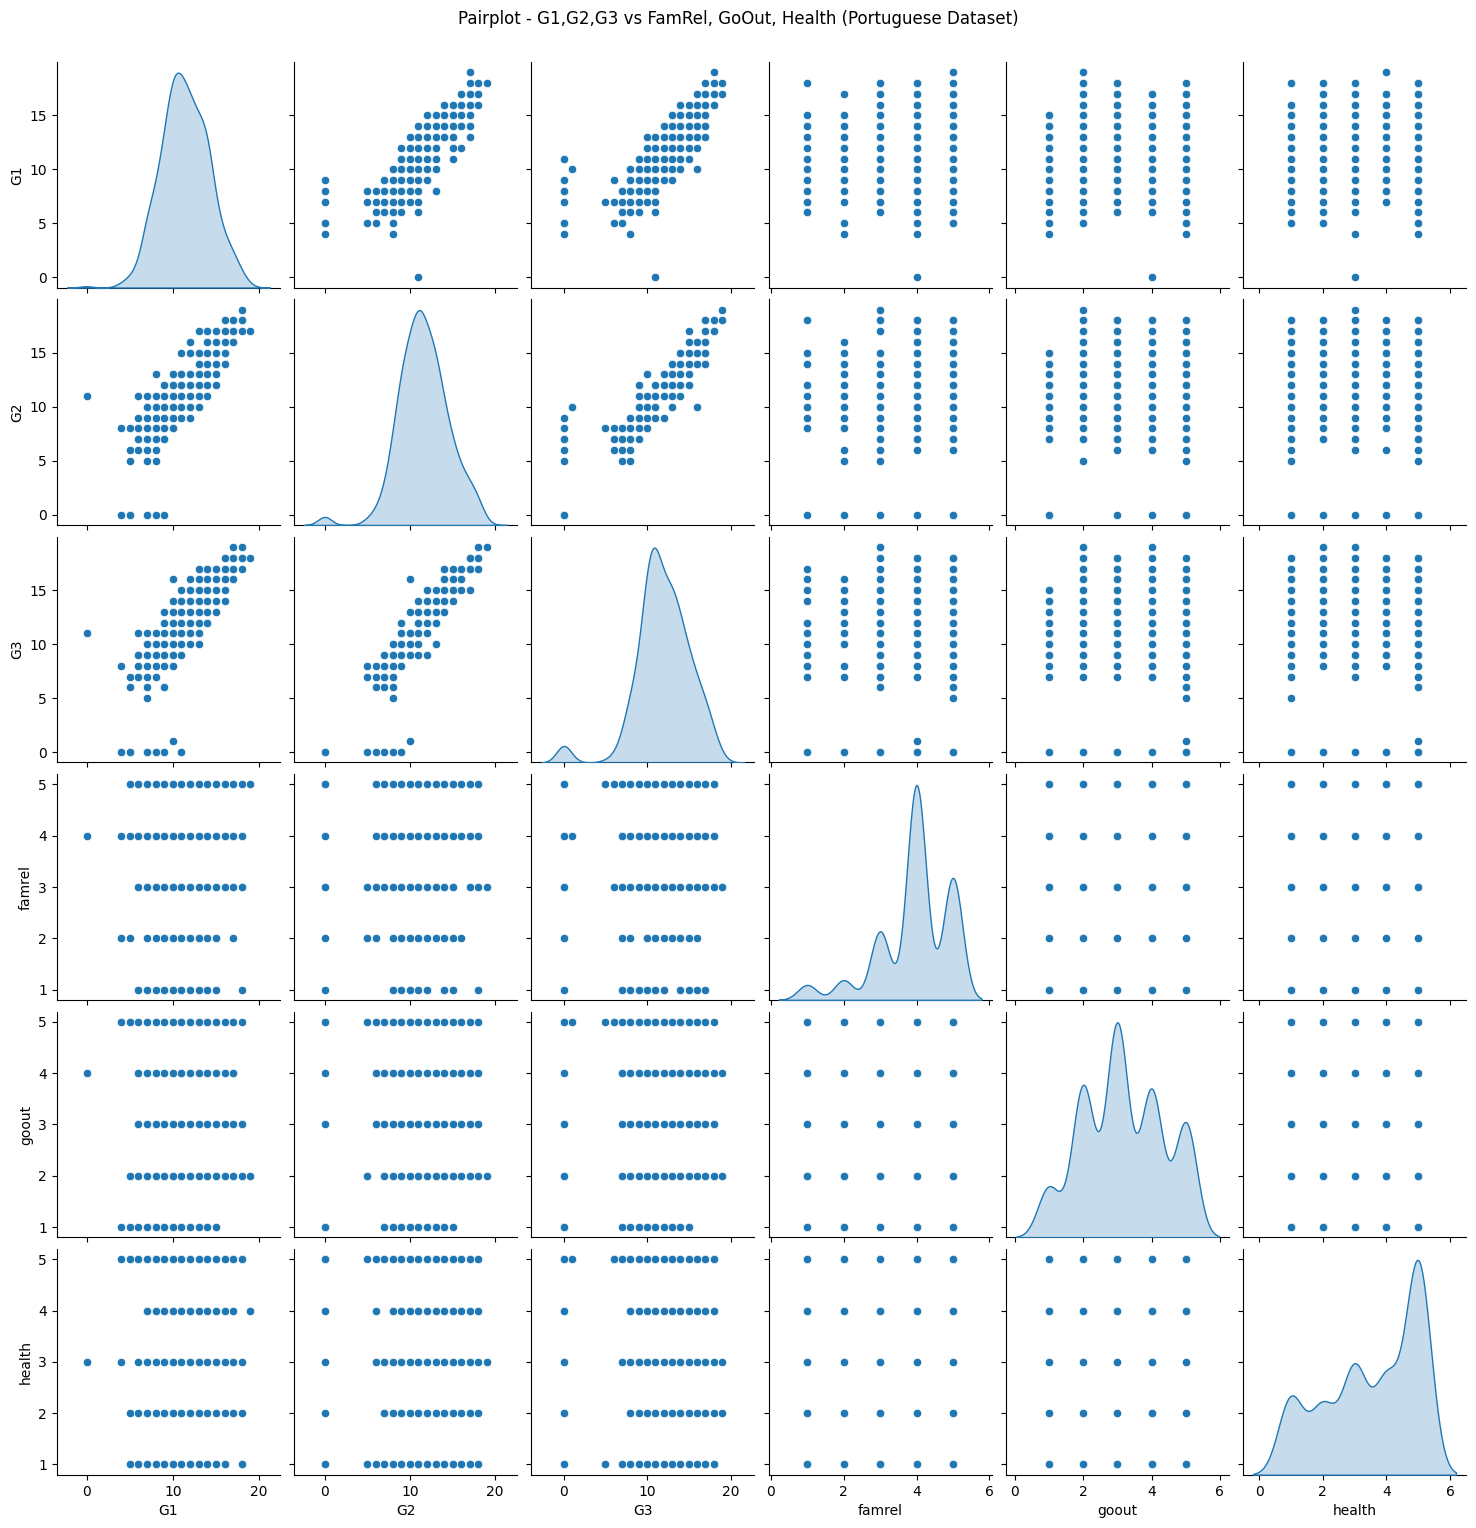

In [37]:
main_cols = ['G1', 'G2', 'G3']
extra_cols = ['famrel', 'goout', 'health']

cols_to_plot = main_cols + extra_cols


sns.pairplot(df_mat[cols_to_plot], diag_kind="kde")
plt.suptitle("Pairplot - G1,G2,G3 vs FamRel, GoOut, Health (Math Dataset)", y=1.02)
plt.show()


sns.pairplot(df_por[cols_to_plot], diag_kind="kde")
plt.suptitle("Pairplot - G1,G2,G3 vs FamRel, GoOut, Health (Portuguese Dataset)", y=1.02)
plt.show()


## Statistical Report

### Pairplot Analysis (G1, G2, G3 vs Various Features)

G1, G2, G3 vs studytime and traveltime
- G1 – studytime / G2 – studytime / G3 – studytime:
  Weak to moderate positive correlation
- G1/G2/G3 – traveltime:
  Weak correlation

G1, G2, G3 vs failures, absences, internet
- G1/G2/G3 – failures:
  Moderate negative correlation
- G1/G2/G3 – absences:
  Weak to moderate negative correlation
- G1/G2/G3 – internet:
  Weak correlation

G1, G2, G3 vs famrel, goout, health
- G1/G2/G3 – famrel:
  Weak correlation
- G1/G2/G3 – goout:
  Weak correlation
- G1/G2/G3 – health:
  Weak to moderate positive correlation

G1/G2/G3 vs age
- Weak correlation

Summary:
- Relatively strong relationship: failures (negative, moderate)
- Weak to moderate: studytime and health (positive)
- Weak or unclear: traveltime, absences, internet, famrel, goout, age

### Final Grade Plots Analysis

Boxplot of Final Grade
- Final grades have moderate spread
- Some outliers (very low or very high grades)
- Median grades around 10-12
- Distribution slightly skewed toward lower grades

Histogram of Final Grade
- Most students score between 10 and 15
- Few grades above 18 or below 5
- Approximately unimodal, slightly right-skewed

Violin Plot of Final Grade
- Shows distribution density more clearly than histogram
- Main density between 10 and 15
- Left and right tails exist but less dense


Multivariate Histogram (Final Grade by Gender)
- No significant difference between genders
- Both genders have similar distribution, main density 10-15
- Sample sizes may diffe

Scatter Plot (Final Grade vs StudyTime)
- Weak positive relationship
- Students with more study time slightly higher grades, but high dispersion

CountPlot (Final Grade vs Walc)
- Students with higher weekend alcohol consumption slightly lower grades
- Weak negative correlation between Walc and final grade
- High dispersion within each Walc group

### Correlation Heatmap Analysis

G1, G2, and G3 (Grades)

G1 and G2 are strongly positively correlated with G3:

G1 vs G3: ~0.91

G2 vs G3: ~0.94

This indicates that earlier exam scores are highly predictive of the final grade.

Studytime

Studytime shows a weak positive correlation with G3 (~0.15), suggesting that students who study more weekly tend to score slightly higher.

Failures

Failures are negatively correlated with G3 (~-0.35). Students with more past failures generally have lower final grades.

Absences

Absences have a weak negative correlation with G3 (~-0.13). Higher absenteeism slightly reduces final grades.

Alcohol Consumption (Dalc, Walc)

Dalc (weekday alcohol) and Walc (weekend alcohol) have very weak negative correlations with G3 (-0.08 and -0.11, respectively). The effect on grades is minimal.

Health, Freetime, Goout, Famrel

These variables show little to no correlation with G3 (< |0.1|), suggesting minimal direct influence on final grades.

Inter-correlations

G1 and G2: ~0.95, very high correlation

Failures negatively correlate with G1 (~-0.36) and G2 (~-0.33)

Studytime slightly positively correlates with G1 and G2 (~0.12–0.15)

Summary:

The strongest predictors of final grade are prior grades (G1, G2) and past failures.

Lifestyle and social factors (alcohol, health, freetime) have minor influence on grades.

The heatmap visually confirms these trends: G3 aligns strongly with G1/G2, and weaker correlations are seen elsewhere.